# LetsGrowMoreVIP - Data Science Internship
## Beginner Level Task-1 - Iris Flowers Classification ML Project
Author - Pawan suthar


# Description of the task  

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

# Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#load dataset 
df = pd.read_csv('Iris.csv')

#show first 5 rows of dataset
df.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# display stats of data 
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
#more info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#to display no. of samples on each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
#checking of null data
df.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [7]:
df.shape #no. of rows and column in dataset

(150, 5)

In [8]:
df.columns #see columns name 

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

In [9]:
df.nunique() #show unique element in object

SepalLength    35
SepalWidth     23
PetalLength    43
PetalWidth     22
Species         3
dtype: int64

In [10]:
df.max()


SepalLength               7.9
SepalWidth                4.4
PetalLength               6.9
PetalWidth                2.5
Species        Iris-virginica
dtype: object

In [11]:
df.min()

SepalLength            4.3
SepalWidth             2.0
PetalLength            1.0
PetalWidth             0.1
Species        Iris-setosa
dtype: object

## Exploratory Data Analysis of Iris dataset
### heatmap

<AxesSubplot:>

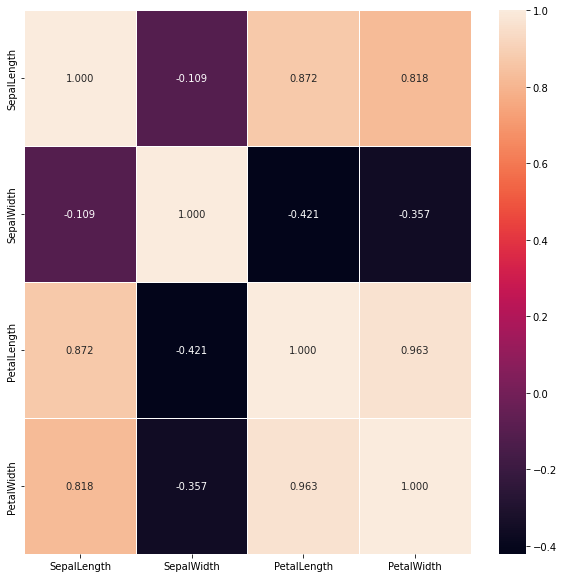

In [12]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr(),annot=True,linewidths=0.5,fmt='.3f')


### histograms

<AxesSubplot:>

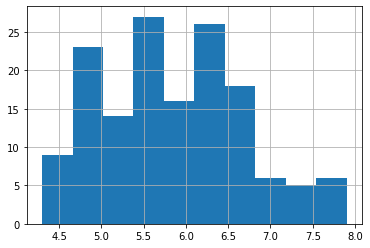

In [13]:
df['SepalLength'].hist()




<AxesSubplot:>

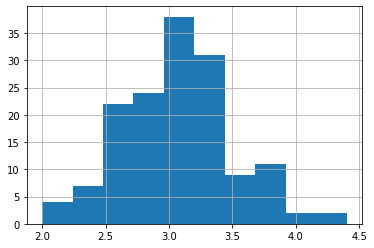

In [14]:
df['SepalWidth'].hist()

<AxesSubplot:>

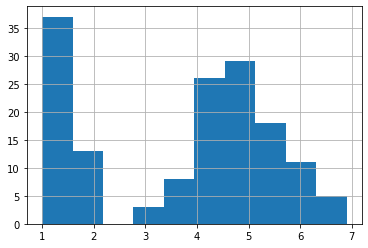

In [15]:
df['PetalLength'].hist()

<AxesSubplot:>

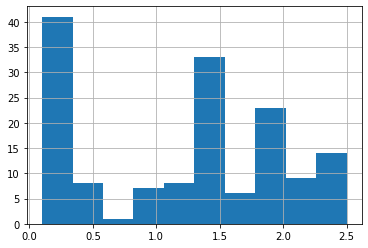

In [16]:
df['PetalWidth'].hist()

### scatterplot


In [17]:
colors = ['red','green','blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']


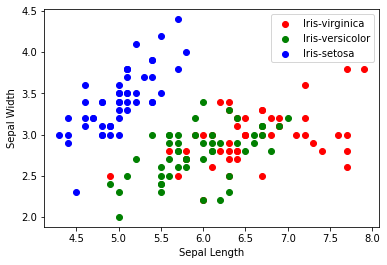

In [18]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLength'], x['SepalWidth'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

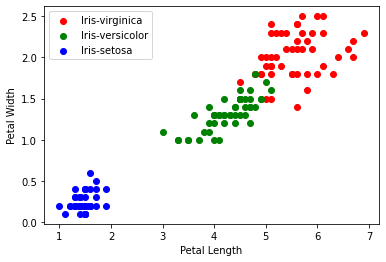

In [19]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLength'], x['PetalWidth'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

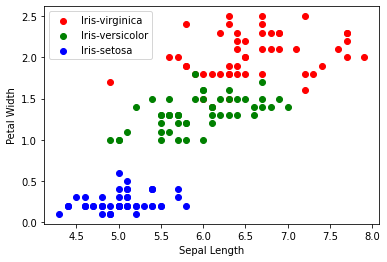

In [20]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLength'], x['PetalWidth'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.legend()

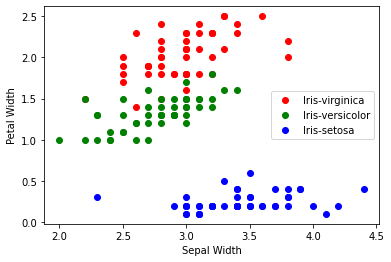

In [21]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidth'], x['PetalWidth'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

### Coorelation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.

In [22]:
df.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

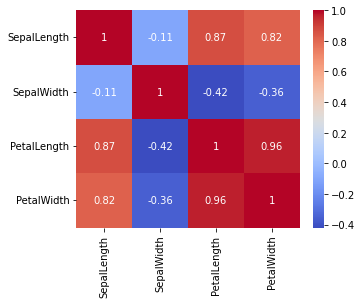

In [23]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sb.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

### Label Encoder
In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Model Training

In [25]:
from sklearn.model_selection import train_test_split
x= df.drop(columns=['Species'])
y= df['Species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

#### logistic regresion

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

#### model training

In [27]:
model.fit(x_train, y_train)

LogisticRegression()

#### knn - k-nearest neighbours


In [28]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [29]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


#### decision tree


In [30]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

### print metric to get performance


In [31]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777
